In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [27]:
folha_url = "bases/base_final_folha_completo.xlsx"

In [28]:
folha = pd.read_excel(folha_url)
print("Quantidade dados folha: ", folha.shape) 

Quantidade dados folha:  (4630, 8)


# Organizando cartas | painel do leitor  da folha de são paulo

In [29]:
print("Quantidade opiniao folha: \n")
folha.opiniao.value_counts()

Quantidade opiniao folha: 



nao    4431
sim     199
Name: opiniao, dtype: int64

# ANÁLISE DE CLASSIFICAÇÃO ENTRE AS CARTAS DA FOLHA

In [30]:
# quantas cartas estão em cada tipo de classificação ? 
grp_metaforico_carta = folha.groupby(["metaforico", "opiniao"], as_index = False).size().rename(columns = {"size": "quantidade_opiniao"})
grp_metaforico = folha.groupby("metaforico", as_index = False).size().rename(columns = {"size": "quantidade_metaforico"})
grp1 = grp_metaforico_carta.merge(grp_metaforico, on = "metaforico", how = "left")
grp1["percentual"] = (grp1["quantidade_opiniao"] / grp1["quantidade_metaforico"]) * 100
grp1


,metaforico,opiniao,quantidade_opiniao,quantidade_metaforico,percentual
0,nao,nao,3435,3496,98.255149
1,nao,sim,61,3496,1.744851
2,sim,nao,996,1134,87.830688
3,sim,sim,138,1134,12.169312


### O que quer dizer? 
- Do que foi classificado como metafórico, 12% são originalmente opinião;

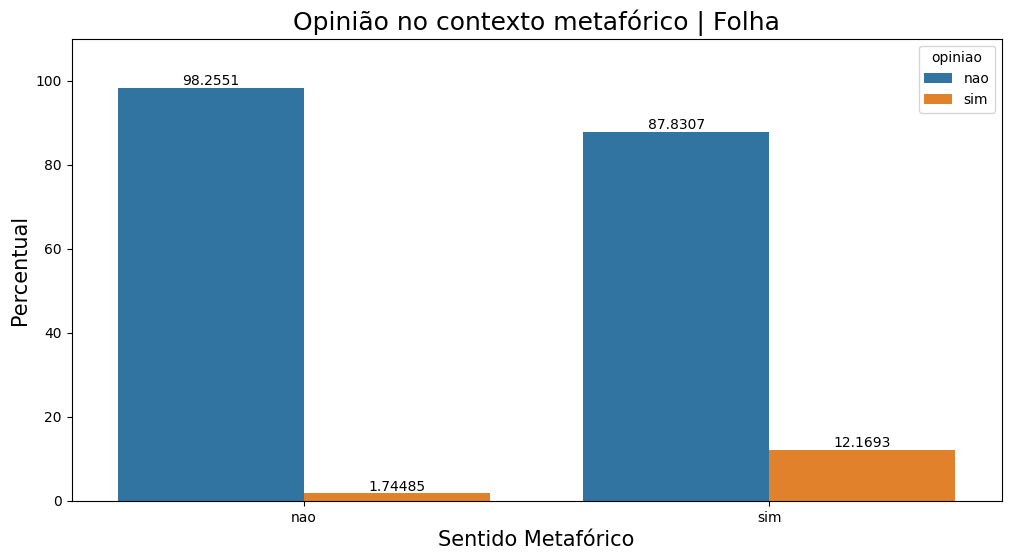

In [31]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = "metaforico", y = "percentual", hue = "opiniao", data = grp1)
ax.set_xlabel("Sentido Metafórico", fontsize = 15)
ax.set_ylabel("Percentual", fontsize = 15)
ax.set_title("Opinião no contexto metafórico | Folha", fontsize = 18)
ax.set_ylim(0, 110)
for i in ax.containers:
    ax.bar_label(i,)
ax = ax 

In [32]:
grp_carta_metaforico = folha.groupby(["opiniao", "metaforico"], as_index = False).size().rename(columns = {"size": "quantidade_metaforicos"})
grp_carta = folha.groupby("opiniao", as_index = False).size().rename(columns = {"size": "quantidade_opiniao"})
grp11 = grp_carta_metaforico.merge(grp_carta, on = "opiniao", how = "left")
grp11["percentual"] = (grp11["quantidade_metaforicos"] / grp11["quantidade_opiniao"]) * 100
grp11


,opiniao,metaforico,quantidade_metaforicos,quantidade_opiniao,percentual
0,nao,nao,3435,4431,77.522004
1,nao,sim,996,4431,22.477996
2,sim,nao,61,199,30.653266
3,sim,sim,138,199,69.346734


### O que quer dizer?
- Das opinões encontradas, 69% foi calsssificado com uso no sentido metafórico;
- Do que não é opinião, 22% foi classificado como metafórico;

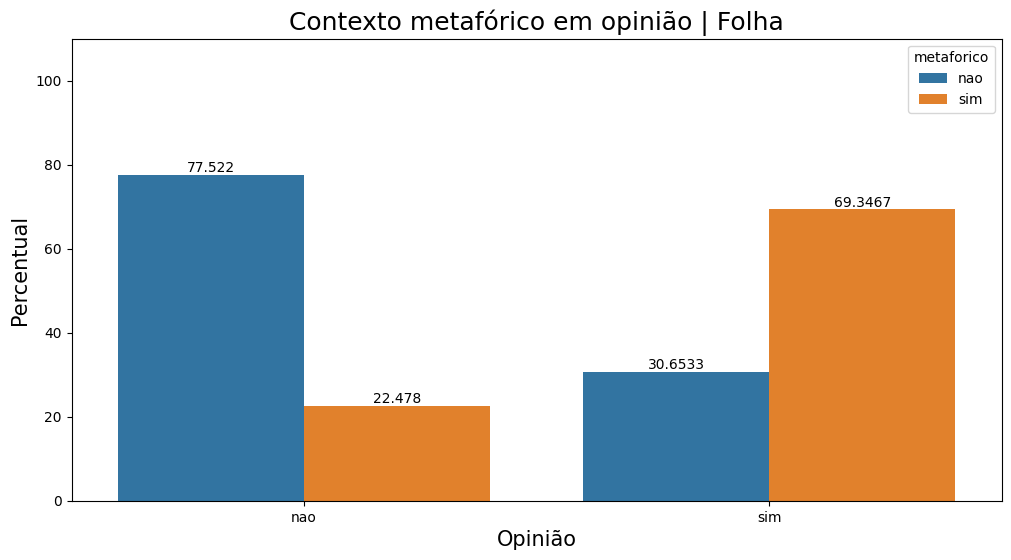

In [33]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = "opiniao", y = "percentual", hue = "metaforico", data = grp11)
ax.set_xlabel("Opinião", fontsize = 15)
ax.set_ylabel("Percentual", fontsize = 15)
ax.set_title("Contexto metafórico em opinião | Folha", fontsize = 18)
ax.set_ylim(0, 110)
for i in ax.containers:
    ax.bar_label(i,)
ax = ax 

# Análises de proporcionalidades

In [34]:
grp_carta_metaforico

,opiniao,metaforico,quantidade_metaforicos
0,nao,nao,3435
1,nao,sim,996
2,sim,nao,61
3,sim,sim,138


## O que significa: 
- Dentre os textos de opinião, os texto classficados como não-metafórico estão na proporção de 1:2.26. Ou seja, a cada uma carta classificada como não-metafórico, temos 2.26 classficadas como metafórico
- Dentre os textos comuns, os textos calssificados como não-metafóricos estão na proporção de 1:0.28. Ou seja, a cada um carta classificada como não-metafórico, temos 0.28 sendo classificadas como metafóricos

In [35]:
!jupyter nbconvert --to html --no-input analise_opiniao_folha_completo.ipynb

[NbConvertApp] Converting notebook analise_opiniao_folha_completo.ipynb to html
[NbConvertApp] Writing 662626 bytes to analise_opiniao_folha_completo.html


In [36]:
# folha.to_excel("base_aplicacao_resultado/folha_cartas_identificadas.xlsx", index = False)
# estadao.to_excel("base_aplicacao_resultado/estadao_cartas_identificadas.xlsx", index = False)